In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('College_Data', index_col = 0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [6]:
X = df.drop('Private', axis = 1)

In [7]:
from sklearn.preprocessing import scale
from pyclustertend import hopkins

In [8]:
hopkins(X, X.shape[0])

0.06939505855121625

In [9]:
hopkins(scale(X), X.shape[0])

0.13872379735197096

In [10]:
from sklearn.cluster import KMeans

In [11]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(X)
    ssd.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

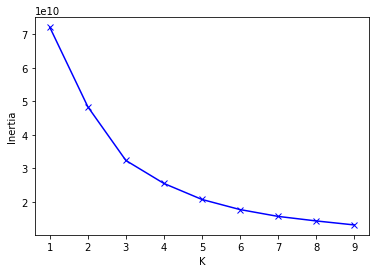

In [12]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")

In [13]:
from yellowbrick.cluster import KElbowVisualizer

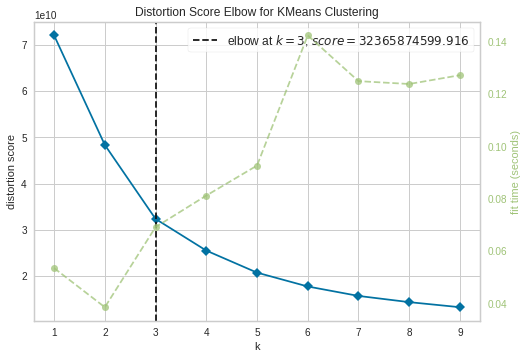

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(X)
visu.poof()

In [15]:
kmeans = KMeans(n_clusters = 3).fit(X)

In [16]:
clusters = kmeans.labels_

In [17]:
centroids = kmeans.cluster_centers_

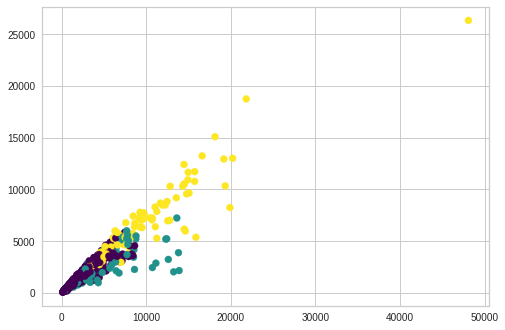

In [18]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = clusters, cmap = 'viridis')

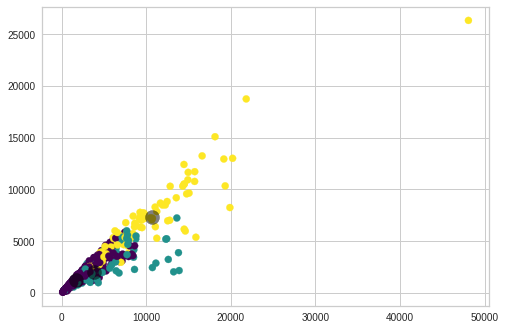

In [19]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = clusters, s = 50, cmap = 'viridis')
plt.scatter(centroids[:,0], centroids[:,1], c = 'black', s = 200, alpha = 0.5)

In [20]:
df['predicted_clusters'] = clusters

In [21]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,predicted_clusters
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [22]:
df.sample(15)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,predicted_clusters
Baylor University,Yes,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72,2
Grinnell College,Yes,2039,1389,432,56,91,1333,30,15688,4618,400,400,88,92,9.5,54,18979,83,1
Saint Xavier University,Yes,785,647,295,15,65,1670,726,10860,4624,600,794,87,100,13.7,15,8953,55,0
Oklahoma State University,No,4522,3913,2181,29,57,12830,1658,5336,3344,800,3100,84,92,15.3,14,6433,48,2
University of the Arts,Yes,974,704,290,5,22,1145,39,12520,3860,1300,700,16,59,7.5,9,11641,57,0
Stockton College of New Jersey,No,4019,1579,710,23,65,4365,765,3040,4351,711,1125,78,92,19.5,7,5599,64,0
Winona State University,No,3325,2047,1301,20,45,5800,872,4200,2700,300,1200,53,60,20.2,18,5318,58,0
Salem College,Yes,335,284,132,28,69,534,216,10475,6300,500,2000,68,68,11.2,46,9599,60,0
Indiana Wesleyan University,Yes,735,423,366,20,48,2448,707,9210,3782,700,1000,49,51,39.8,15,6562,34,0
LeTourneau University,Yes,477,417,204,29,54,1532,77,8840,4240,600,1400,58,70,20.8,23,6863,56,0


In [23]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [24]:
print(f'Silhouette Score(n=3): {silhouette_score(X, clusters)}')

Silhouette Score(n=3): 0.4759356725934926


In [25]:
ct = pd.crosstab(df['predicted_clusters'], df['Private'])

In [26]:
ct

Private,No,Yes
predicted_clusters,,
0,135,430
1,1,128
2,76,7


In [27]:
kmeans = KMeans(n_clusters = 2).fit(X)

In [28]:
clusters = kmeans.labels_

In [29]:
centroids = kmeans.cluster_centers_

In [30]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [31]:
print(f'Silhouette Score(n=2): {silhouette_score(X, clusters)}')

Silhouette Score(n=2): 0.5599267817640777


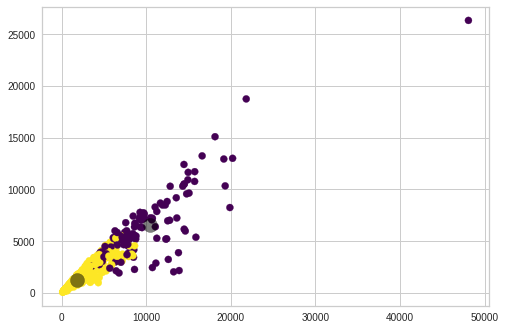

In [32]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = clusters, s = 50, cmap = 'viridis')
plt.scatter(centroids[:,0], centroids[:,1], c = 'black', s = 200, alpha = 0.5)

In [33]:
df['predicted_clusters_2'] = clusters

In [34]:
ct = pd.crosstab(df['predicted_clusters_2'], df['Private'])

In [35]:
ct

Private,No,Yes
predicted_clusters_2,,
0,74,34
1,138,531


In [39]:
df['Private2']=df['Private'].apply(lambda x:1 if x=='Yes' else 0)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(df['Private2'], df['predicted_clusters_2']))

[[ 74 138]
 [ 34 531]]


In [41]:
print(classification_report(df['Private2'], df['predicted_clusters_2']))

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

